In [1]:
import steamreviews
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import datetime
import missingno as msno
import seaborn as sns
import nltk
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
import string
import fasttext
import pickle
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
import gensim
import re

%matplotlib inline

In [ ]:
request_params = dict()
request_params['filter'] = 'all' 
request_params['day_range'] = '60' 
request_params['language'] = 'english' 


app_id = 1097150
review_dict, query_count = steamreviews.download_reviews_for_app_id(app_id,
                                                                    chosen_request_params=request_params)

In [65]:
with open('C:/Users/laura/Documents/DS/ProjectSteam/review_1097150.json') as jsonfile:
    f = json.load(jsonfile)

In [66]:
review_data = [v for v in f['reviews'].values()]
author_key_list = list(review_data[0]['author'].keys())

In [67]:
len(review_data)

14559

In [68]:
steam_dict = {'recommendationid':[review_data[i]['recommendationid'] for i in range(len(review_data))],
              
              'author_steamid':[review_data[i]['author']['steamid'] for i in range(len(review_data))],
              
              'author_num_games_owned':[review_data[i]['author']['num_games_owned'] for i in range(len(review_data))],
              
              'author_num_reviews':[review_data[i]['author']['num_reviews'] for i in range(len(review_data))],
              
              'author_playtime_forever':[review_data[i]['author']['playtime_forever'] for i in range(len(review_data))], 
              
              'author_playtime_last_two_weeks':[review_data[i]['author']['playtime_last_two_weeks'] for i in range(len(review_data))],
              
              'author_last_played':[review_data[i]['author']['last_played'] for i in range(len(review_data))],
              
              'review':[review_data[i]['review'] for i in range(len(review_data))],
              
              'timestamp_created':[review_data[i]['timestamp_created'] for i in range(len(review_data))],
              
              'timestamp_updated':[review_data[i]['timestamp_updated'] for i in range(len(review_data))],
              
              'voted_up':[review_data[i]['voted_up'] for i in range(len(review_data))],
              
              'weighted_vote_score':[review_data[i]['weighted_vote_score'] for i in range(len(review_data))],
              
              'steam_purchase':[review_data[i]['steam_purchase'] for i in range(len(review_data))],
              
              'received_for_free':[review_data[i]['received_for_free'] for i in range(len(review_data))],
              
              'written_during_early_access':[review_data[i]['written_during_early_access'] for i in range(len(review_data))]}

In [69]:
df_raw = pd.DataFrame(steam_dict)
df_raw.head()

,recommendationid,author_steamid,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_last_played,review,timestamp_created,timestamp_updated,voted_up,weighted_vote_score,steam_purchase,received_for_free,written_during_early_access
0,74474375,76561198830004913,348,34,971,247,1600602505,Fall Guys is a chill and fun game but it rea...,1597696032,1597696032,True,0.969307124614715576,True,False,False
1,73899674,76561198104502231,54,23,7395,819,1601273558,"I gave a little Hug to a player, he stared bac...",1596781693,1596781693,True,0.947030186653137207,True,False,False
2,74344973,76561199082327854,5,2,1791,7,1600371713,I'd reccomend it so much i'd buy it for you,1597492392,1597492392,True,0.941293001174926758,True,False,False
3,74829104,76561198118466702,74,9,1455,0,1599395918,you can hug people,1598265916,1598265916,True,0.940279126167297363,True,False,False
4,74014670,76561198169477203,1094,36,391,0,1599323988,"When I was a little boy, I liked to see the Wi...",1596956542,1596972249,True,0.934246063232421875,True,False,False


In [10]:
df_raw.tail()

,recommendationid,author_steamid,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_last_played,review,timestamp_created,timestamp_updated,voted_up,weighted_vote_score,steam_purchase,received_for_free,written_during_early_access
14554,73740731,76561198848771713,25,5,959,4,1601054410,very fun and competitive especially with frien...,1596534204,1596534204,True,0.5,True,False,False
14555,73737061,76561198365104636,65,2,1705,79,1600896386,This game is extremely fun and a nice break fr...,1596527904,1596527904,True,0.5,True,False,False
14556,73736582,76561198160511379,173,2,9,0,1596527084,Game dose not support 21:9,1596527143,1596527143,False,0.5,True,False,False
14557,74808815,76561198244287820,17,1,3477,120,1600708090,Fun to play & they keep working on this game,1598227102,1600545851,True,0.841063201427459717,True,False,False
14558,75195584,76561198075883037,3135,53,4348,644,1601309845,[h1]The Turn Around[/h1]\nIf you read my previ...,1598834438,1600522386,True,0.787338018417358398,False,False,False


In [11]:
df_raw.dtypes

recommendationid                  object
author_steamid                    object
author_num_games_owned             int64
author_num_reviews                 int64
author_playtime_forever            int64
author_playtime_last_two_weeks     int64
author_last_played                 int64
review                            object
timestamp_created                  int64
timestamp_updated                  int64
voted_up                            bool
weighted_vote_score               object
steam_purchase                      bool
received_for_free                   bool
written_during_early_access         bool
dtype: object

In [12]:
df_raw.shape

(14559, 15)

In [13]:
df_raw['voted_up'].value_counts(normalize=True)

True     0.746755
False    0.253245
Name: voted_up, dtype: float64

In [14]:
df_raw['steam_purchase'].value_counts()

True     12684
False     1875
Name: steam_purchase, dtype: int64

In [15]:
df_raw['received_for_free'].value_counts()

False    14108
True       451
Name: received_for_free, dtype: int64

In [16]:
df_raw['written_during_early_access'].value_counts()

False    14559
Name: written_during_early_access, dtype: int64

### reviews
1. recommendationid - The unique id of the recommendation
### author
1. steamid - the user’s SteamID
2. num_games_owned - number of games owned by the user
3. num_reviews - number of reviews written by the user
4. playtime_forever - lifetime playtime tracked in this app
5. playtime_last_two_weeks - playtime tracked in the past two weeks for this app
6. playtime_at_review - playtime when the review was written
7. last_played - time for when the user last played
8. language - language the user indicated when authoring the review
9. review - text of written review
10. timestamp_created - date the review was created (unix timestamp)
11. timestamp_updated - date the review was last updated (unix timestamp)
12. voted_up - true means it was a positive recommendation
13. votes_up - the number of users that found this review helpful
14. votes_funny - the number of users that found this review funny
15. weighted_vote_score - helpfulness score
16. comment_count - number of comments posted on this review
17. steam_purchase - true if the user purchased the game on Steam
18. received_for_free - true if the user checked a box saying they got the app for free
19. written_during_early_access - true if the user posted this review while the game was in Early Access

In [70]:
df_raw.drop(['recommendationid', 'author_steamid', 'steam_purchase', 'received_for_free', 'written_during_early_access'], axis = 1, inplace = True)
df_raw.head()

,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_last_played,review,timestamp_created,timestamp_updated,voted_up,weighted_vote_score
0,348,34,971,247,1600602505,Fall Guys is a chill and fun game but it rea...,1597696032,1597696032,True,0.969307124614715576
1,54,23,7395,819,1601273558,"I gave a little Hug to a player, he stared bac...",1596781693,1596781693,True,0.947030186653137207
2,5,2,1791,7,1600371713,I'd reccomend it so much i'd buy it for you,1597492392,1597492392,True,0.941293001174926758
3,74,9,1455,0,1599395918,you can hug people,1598265916,1598265916,True,0.940279126167297363
4,1094,36,391,0,1599323988,"When I was a little boy, I liked to see the Wi...",1596956542,1596972249,True,0.934246063232421875


In [71]:
df_raw['weighted_vote_score'] = df_raw['weighted_vote_score'].map(lambda x: float(x))

In [72]:
df_raw['author_playtime_forever']=df_raw['author_playtime_forever']/60
df_raw['author_playtime_last_two_weeks']=df_raw['author_playtime_last_two_weeks']/60

In [73]:
cols = ['author_playtime_forever', 'author_playtime_last_two_weeks', 'weighted_vote_score']
df_raw[cols] = df_raw[cols].round(2)

In [74]:
df_raw['author_last_played'] = pd.to_datetime(df_raw['author_last_played'],unit='s')
df_raw['timestamp_created'] = pd.to_datetime(df_raw['timestamp_created'],unit='s')
df_raw['timestamp_updated'] = pd.to_datetime(df_raw['timestamp_updated'],unit='s')

In [64]:
df_raw.head()

,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_last_played,review,timestamp_created,timestamp_updated,voted_up,weighted_vote_score
0,348,34,16.18,4.12,2020-09-20 11:48:25,Fall Guys is a chill and fun game but it rea...,2020-08-17 20:27:12,2020-08-17 20:27:12,True,0.97
1,54,23,123.25,13.65,2020-09-28 06:12:38,"I gave a little Hug to a player, he stared bac...",2020-08-07 06:28:13,2020-08-07 06:28:13,True,0.95
2,5,2,29.85,0.12,2020-09-17 19:41:53,I'd reccomend it so much i'd buy it for you,2020-08-15 11:53:12,2020-08-15 11:53:12,True,0.94
3,74,9,24.25,0.00,2020-09-06 12:38:38,you can hug people,2020-08-24 10:45:16,2020-08-24 10:45:16,True,0.94
4,1094,36,6.52,0.00,2020-09-05 16:39:48,"When I was a little boy, I liked to see the Wi...",2020-08-09 07:02:22,2020-08-09 11:24:09,True,0.93


In [23]:
df_raw.tail()

,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_last_played,review,timestamp_created,timestamp_updated,voted_up,weighted_vote_score
14554,25,5,15.98,0.07,2020-09-25 17:20:10,very fun and competitive especially with frien...,2020-08-04 09:43:24,2020-08-04 09:43:24,True,0.50
14555,65,2,28.42,1.32,2020-09-23 21:26:26,This game is extremely fun and a nice break fr...,2020-08-04 07:58:24,2020-08-04 07:58:24,True,0.50
14556,173,2,0.15,0.00,2020-08-04 07:44:44,Game dose not support 21:9,2020-08-04 07:45:43,2020-08-04 07:45:43,False,0.50
14557,17,1,57.95,2.00,2020-09-21 17:08:10,Fun to play & they keep working on this game,2020-08-23 23:58:22,2020-09-19 20:04:11,True,0.84
14558,3135,53,72.47,10.73,2020-09-28 16:17:25,[h1]The Turn Around[/h1]\nIf you read my previ...,2020-08-31 00:40:38,2020-09-19 13:33:06,True,0.79


In [24]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14559 entries, 0 to 14558
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   author_num_games_owned          14559 non-null  int64         
 1   author_num_reviews              14559 non-null  int64         
 2   author_playtime_forever         14559 non-null  float64       
 3   author_playtime_last_two_weeks  14559 non-null  float64       
 4   author_last_played              14559 non-null  datetime64[ns]
 5   review                          14559 non-null  object        
 6   timestamp_created               14559 non-null  datetime64[ns]
 7   timestamp_updated               14559 non-null  datetime64[ns]
 8   voted_up                        14559 non-null  bool          
 9   weighted_vote_score             14559 non-null  float64       
dtypes: bool(1), datetime64[ns](3), float64(3), int64(2), object(1)
memory 

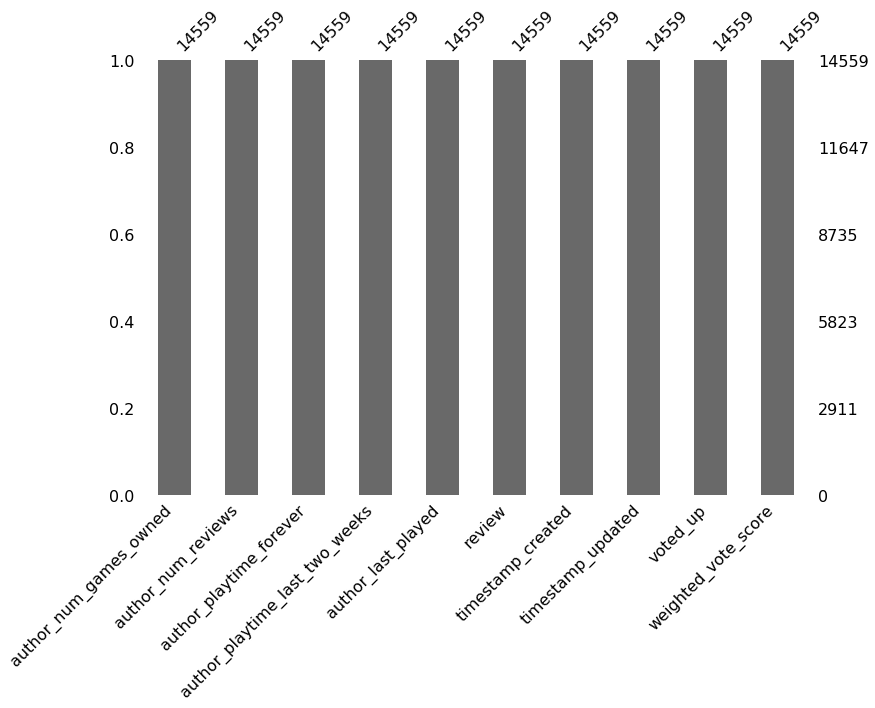

In [25]:
msno.bar(df_raw, figsize=(12,8))

## EDA

In [75]:
df_raw.describe().round(2)

,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,weighted_vote_score
count,14559.00,14559.00,14559.00,14559.00,14559.00
mean,174.71,10.74,32.73,3.48,0.53
std,399.73,34.72,42.96,11.31,0.03
min,0.00,1.00,0.10,0.00,0.50
25%,22.00,2.00,10.05,0.00,0.52
50%,71.00,4.00,20.83,0.25,0.52
75%,190.00,10.00,41.76,2.43,0.53
max,14338.00,2304.00,1333.27,333.63,0.97


In [27]:
df_raw[(df_raw['author_num_games_owned']==0)]

,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_last_played,review,timestamp_created,timestamp_updated,voted_up,weighted_vote_score
357,0,6,58.55,0.00,2020-09-11 13:39:54,game,2020-08-04 14:03:28,2020-08-04 14:03:28,True,0.58
361,0,6,16.27,0.42,2020-09-26 01:16:53,This is a great game. I played the beta a lot ...,2020-08-04 17:57:52,2020-08-04 17:57:52,True,0.58
454,0,3,16.72,0.00,2020-09-12 12:47:07,needs more cum,2020-08-23 09:48:20,2020-08-23 09:48:20,True,0.58
2554,0,1,2.67,0.00,2020-09-08 20:14:12,A TOTAL GARBAGE!!\ni wish i never bought it an...,2020-09-08 18:35:08,2020-09-08 18:35:08,False,0.54
3333,0,1,1.13,0.00,2020-09-04 14:47:27,It’s good\n,2020-09-04 18:03:11,2020-09-04 18:03:11,True,0.53
3788,0,1,1.43,0.00,2020-08-15 23:54:54,I have 70 min on the game. 65 of those are try...,2020-08-14 21:12:07,2020-08-14 21:12:07,False,0.53
5542,0,1,2.70,0.00,2020-08-31 19:19:25,Fun... but a lot of hackers,2020-08-31 19:21:23,2020-08-31 19:21:23,True,0.52
5663,0,1,1.02,0.00,2020-08-30 23:15:43,jebane gówno w które nie da się grać. nie pole...,2020-08-30 23:20:13,2020-08-30 23:22:55,False,0.52
6850,0,1,1.03,0.00,2020-08-23 06:44:20,Great and Very Fun,2020-08-23 09:27:10,2020-08-23 09:27:10,True,0.52
8294,0,1,1.58,0.00,2020-08-15 23:30:09,IT SUCKS THE BUTTONS BARELY REPOND,2020-08-14 20:43:08,2020-08-14 20:43:08,False,0.52


(array([1.2335e+04, 1.9160e+03, 1.6700e+02, 3.3000e+01, 2.8000e+01,
        1.9000e+01, 1.3000e+01, 2.5000e+01, 1.7000e+01, 6.0000e+00]),
 array([0.5  , 0.547, 0.594, 0.641, 0.688, 0.735, 0.782, 0.829, 0.876,
        0.923, 0.97 ]),
 <a list of 10 Patch objects>)

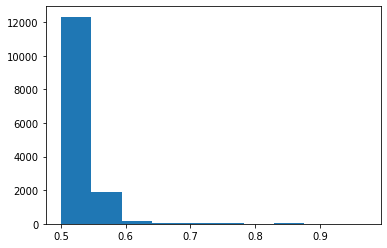

In [28]:
plt.hist(df_raw['weighted_vote_score'])

In [29]:
list_hour = [0, 20, 40, max(df_raw.author_playtime_forever)]

In [30]:
bin_labels_3 = ['low', 'medium', 'high']
df_raw['playtime_forever_cat'] = pd.cut(df_raw['author_playtime_forever'],
                              bins=list_hour,
                              labels=bin_labels_3)

In [31]:
results, bin_edges = pd.cut(df_raw['author_playtime_forever'],
                            bins=list_hour,
                            labels=bin_labels_3,
                            retbins=True)

results_table = pd.DataFrame(zip(bin_edges, bin_labels_3),
                            columns=['Threshold', 'category'])

results_table

,Threshold,category
0,0.0,low
1,20.0,medium
2,40.0,high


In [32]:
df_raw['playtime_forever_cat'].value_counts()

low       7041
high      3828
medium    3690
Name: playtime_forever_cat, dtype: int64

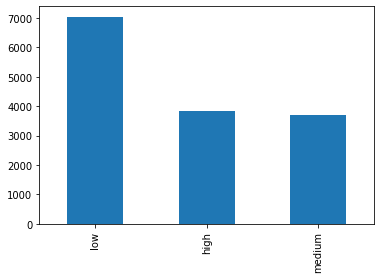

In [33]:
df_raw['playtime_forever_cat'].value_counts().plot(kind= 'bar')

In [34]:
(pd.crosstab(df_raw.voted_up, df_raw.playtime_forever_cat, normalize = 'columns')*100).round(2)

playtime_forever_cat,low,medium,high
voted_up,,,
False,33.05,19.46,16.77
True,66.95,80.54,83.23


In [35]:
cat_products = [0, 50, 100, max(df_raw.author_num_games_owned)]

In [36]:
bin_labels_3 = ['low', 'medium', 'high']
df_raw['prod_cat'] = pd.cut(df_raw['author_num_games_owned'],
                              bins=cat_products,
                              labels=bin_labels_3)

In [37]:
df_raw['prod_cat'].value_counts()

low       6067
high      5996
medium    2485
Name: prod_cat, dtype: int64

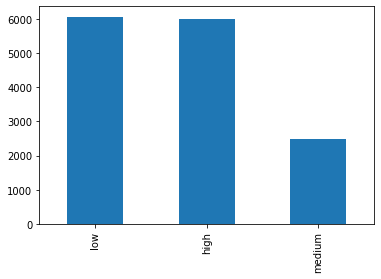

In [38]:
df_raw['prod_cat'].value_counts().plot(kind= 'bar')

In [39]:
(pd.crosstab(df_raw.voted_up, df_raw.prod_cat, normalize = 'columns')*100).round(2)

prod_cat,low,medium,high
voted_up,,,
False,19.85,27.0,30.15
True,80.15,73.0,69.85


In [40]:
cat_reviews = [0, 5, 10, max(df_raw.author_num_reviews)]

In [41]:
df_raw['reviews_cat'] = pd.cut(df_raw['author_num_reviews'],
                              bins=cat_products,
                              labels=bin_labels_3)

In [42]:
df_raw['reviews_cat'].value_counts()

low       14074
medium      354
high        131
Name: reviews_cat, dtype: int64

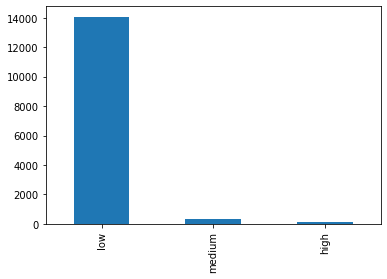

In [43]:
df_raw['reviews_cat'].value_counts().plot(kind= 'bar')

In [44]:
(pd.crosstab(df_raw.voted_up, df_raw.reviews_cat, normalize = 'columns')*100).round(2)

reviews_cat,low,medium,high
voted_up,,,
False,25.27,29.38,20.61
True,74.73,70.62,79.39


In [45]:
df_raw['timestamp_created'] = pd.to_datetime(df_raw['timestamp_created']).dt.normalize()
df_raw['timestamp_updated'] = pd.to_datetime(df_raw['timestamp_updated']).dt.normalize()

In [46]:
ct = pd.crosstab(df_raw.voted_up, df_raw.timestamp_created, rownames=['recommended'], colnames=['date']).T
ct

recommended,False,True
date,,
2020-08-04,110,1364
2020-08-05,92,543
2020-08-06,74,352
2020-08-07,128,336
2020-08-08,73,298
2020-08-09,61,326
2020-08-10,75,322
2020-08-11,59,297
2020-08-12,71,271


<Figure size 720x576 with 0 Axes>

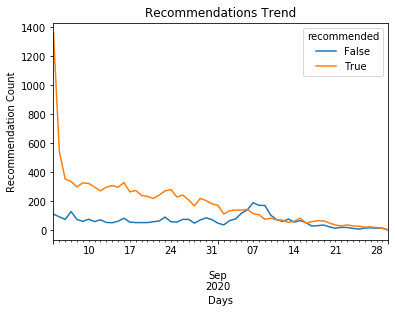

In [47]:
plt.figure(figsize=(10,8))
ct.plot.line()

plt.title('Recommendations Trend')
plt.xlabel('Days') 
plt.ylabel('Recommendation Count') 
plt.show()

In [48]:
reviews_week = df_raw.groupby(pd.Grouper(key='timestamp_created', freq='W')).size()
reviews_week

timestamp_created
2020-08-09    3757
2020-08-16    2569
2020-08-23    2163
2020-08-30    2013
2020-09-06    1571
2020-09-13    1411
2020-09-20     717
2020-09-27     298
2020-10-04      60
Freq: W-SUN, dtype: int64

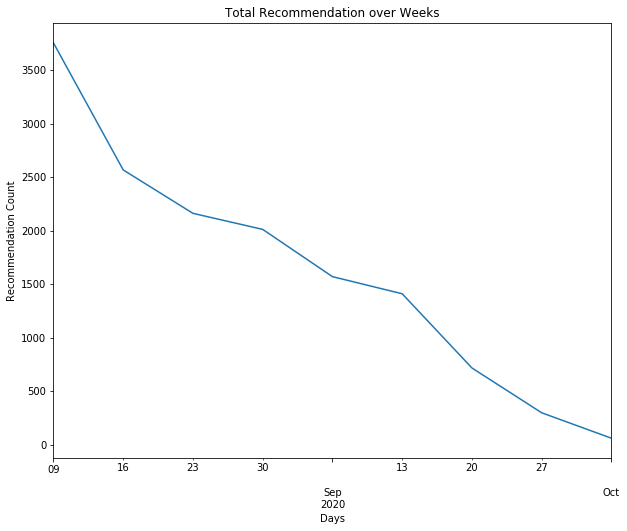

In [49]:
plt.figure(figsize=(10,8))
reviews_week.plot.line()

plt.title('Total Recommendation over Weeks')
plt.xlabel('Days') 
plt.ylabel('Recommendation Count') 
plt.show()

### Take data with 1 hour of total playtime for further analysis

In [76]:
df_time = df_raw[(df_raw['author_playtime_forever']>=1)]
df_time.head()

,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_last_played,review,timestamp_created,timestamp_updated,voted_up,weighted_vote_score
0,348,34,16.18,4.12,2020-09-20 11:48:25,Fall Guys is a chill and fun game but it rea...,2020-08-17 20:27:12,2020-08-17 20:27:12,True,0.97
1,54,23,123.25,13.65,2020-09-28 06:12:38,"I gave a little Hug to a player, he stared bac...",2020-08-07 06:28:13,2020-08-07 06:28:13,True,0.95
2,5,2,29.85,0.12,2020-09-17 19:41:53,I'd reccomend it so much i'd buy it for you,2020-08-15 11:53:12,2020-08-15 11:53:12,True,0.94
3,74,9,24.25,0.00,2020-09-06 12:38:38,you can hug people,2020-08-24 10:45:16,2020-08-24 10:45:16,True,0.94
4,1094,36,6.52,0.00,2020-09-05 16:39:48,"When I was a little boy, I liked to see the Wi...",2020-08-09 07:02:22,2020-08-09 11:24:09,True,0.93


In [51]:
df_time.shape

(14252, 13)

## Taking English Review and Cleaning Text

In [77]:
review_text = df_time.loc[:, ['review', 'voted_up', 'weighted_vote_score']]
review_text.head()

,review,voted_up,weighted_vote_score
0,Fall Guys is a chill and fun game but it rea...,True,0.97
1,"I gave a little Hug to a player, he stared bac...",True,0.95
2,I'd reccomend it so much i'd buy it for you,True,0.94
3,you can hug people,True,0.94
4,"When I was a little boy, I liked to see the Wi...",True,0.93


In [78]:
# Changing I'd into I would
review_text['no_contract'] = review_text['review'].apply(lambda x: [contractions.fix(word) for word in x.split()])
review_text.head()

,review,voted_up,weighted_vote_score,no_contract
0,Fall Guys is a chill and fun game but it rea...,True,0.97,"[Fall, Guys, is, a, chill, and, fun, game, but..."
1,"I gave a little Hug to a player, he stared bac...",True,0.95,"[I, gave, a, little, Hug, to, a, player,, he, ..."
2,I'd reccomend it so much i'd buy it for you,True,0.94,"[I would, reccomend, it, so, much, I would, bu..."
3,you can hug people,True,0.94,"[you, can, hug, people]"
4,"When I was a little boy, I liked to see the Wi...",True,0.93,"[When, I, was, a, little, boy,, I, liked, to, ..."


In [79]:
#Change to string
review_text['text_str'] = [' '.join(map(str, l)) for l in review_text['no_contract']]
review_text.head()

,review,voted_up,weighted_vote_score,no_contract,text_str
0,Fall Guys is a chill and fun game but it rea...,True,0.97,"[Fall, Guys, is, a, chill, and, fun, game, but...",Fall Guys is a chill and fun game but it reall...
1,"I gave a little Hug to a player, he stared bac...",True,0.95,"[I, gave, a, little, Hug, to, a, player,, he, ...","I gave a little Hug to a player, he stared bac..."
2,I'd reccomend it so much i'd buy it for you,True,0.94,"[I would, reccomend, it, so, much, I would, bu...",I would reccomend it so much I would buy it fo...
3,you can hug people,True,0.94,"[you, can, hug, people]",you can hug people
4,"When I was a little boy, I liked to see the Wi...",True,0.93,"[When, I, was, a, little, boy,, I, liked, to, ...","When I was a little boy, I liked to see the Wi..."


In [80]:
#categorize reviews' language using fasttext
pretrained_model = "lid.176.bin" 
model = fasttext.load_model(pretrained_model)

langs = []
for sent in review_text['text_str']:
    lang = model.predict(sent)[0]
    langs.append(str(lang)[11:13])

review_text['langs'] = langs

review_text.head()

,review,voted_up,weighted_vote_score,no_contract,text_str,langs
0,Fall Guys is a chill and fun game but it rea...,True,0.97,"[Fall, Guys, is, a, chill, and, fun, game, but...",Fall Guys is a chill and fun game but it reall...,en
1,"I gave a little Hug to a player, he stared bac...",True,0.95,"[I, gave, a, little, Hug, to, a, player,, he, ...","I gave a little Hug to a player, he stared bac...",en
2,I'd reccomend it so much i'd buy it for you,True,0.94,"[I would, reccomend, it, so, much, I would, bu...",I would reccomend it so much I would buy it fo...,en
3,you can hug people,True,0.94,"[you, can, hug, people]",you can hug people,en
4,"When I was a little boy, I liked to see the Wi...",True,0.93,"[When, I, was, a, little, boy,, I, liked, to, ...","When I was a little boy, I liked to see the Wi...",en


In [81]:
review_text.langs.unique()

array([&#39;en&#39;, &#39;pl&#39;, &#39;tr&#39;, &#39;ja&#39;, &#39;id&#39;, &#39;de&#39;, &#39;ar&#39;, &#39;ru&#39;, &#39;es&#39;, &#39;wa&#39;, &#39;he&#39;,
       &#39;it&#39;, &#39;ko&#39;, &#39;pt&#39;, &#39;fr&#39;, &#39;fi&#39;, &#39;uk&#39;, &#39;zh&#39;, &#39;nl&#39;, &#39;ca&#39;, &#39;sv&#39;, &#39;cs&#39;,
       &#39;hu&#39;, &#39;bg&#39;, &#39;bn&#39;, &#39;su&#39;, &#39;sr&#39;, &#39;mk&#39;, &#39;al&#39;, &#39;bh&#39;, &#39;da&#39;, &#39;no&#39;, &#39;th&#39;,
       &#39;ce&#39;, &#39;eo&#39;, &#39;sk&#39;, &#39;ba&#39;, &#39;mi&#39;, &#39;eu&#39;, &#39;io&#39;, &#39;uz&#39;, &#39;sl&#39;, &#39;vi&#39;, &#39;kk&#39;,
       &#39;el&#39;, &#39;be&#39;, &#39;hy&#39;, &#39;nd&#39;, &#39;ro&#39;, &#39;az&#39;, &#39;nn&#39;, &#39;et&#39;, &#39;si&#39;, &#39;ml&#39;, &#39;jv&#39;,
       &#39;wu&#39;, &#39;lv&#39;, &#39;la&#39;, &#39;lt&#39;, &#39;sh&#39;, &#39;ne&#39;, &#39;sq&#39;, &#39;ms&#39;, &#39;hi&#39;, &#39;ur&#39;, &#39;lb&#39;,
       &#39;fa&#39;, &#39;vo&#39;,

In [82]:
review_text['langs'].value_counts()

en    12944
de      239
ja      159
es      116
fr       98
      ...  
km        1
el        1
be        1
nd        1
hs        1
Name: langs, Length: 80, dtype: int64

In [83]:
#only taking english reviews
review_text = review_text[review_text['langs'] == 'en']

In [84]:
review_text.reset_index(drop= True)

,review,voted_up,weighted_vote_score,no_contract,text_str,langs
0,Fall Guys is a chill and fun game but it rea...,True,0.97,"[Fall, Guys, is, a, chill, and, fun, game, but...",Fall Guys is a chill and fun game but it reall...,en
1,"I gave a little Hug to a player, he stared bac...",True,0.95,"[I, gave, a, little, Hug, to, a, player,, he, ...","I gave a little Hug to a player, he stared bac...",en
2,I'd reccomend it so much i'd buy it for you,True,0.94,"[I would, reccomend, it, so, much, I would, bu...",I would reccomend it so much I would buy it fo...,en
3,you can hug people,True,0.94,"[you, can, hug, people]",you can hug people,en
4,"When I was a little boy, I liked to see the Wi...",True,0.93,"[When, I, was, a, little, boy,, I, liked, to, ...","When I was a little boy, I liked to see the Wi...",en
...,...,...,...,...,...,...
12939,Well made game that i cant get enough of! Many...,True,0.50,"[Well, made, game, that, i, can not, get, enou...",Well made game that i can not get enough of! M...,en
12940,very fun and competitive especially with frien...,True,0.50,"[very, fun, and, competitive, especially, with...",very fun and competitive especially with frien...,en
12941,This game is extremely fun and a nice break fr...,True,0.50,"[This, game, is, extremely, fun, and, a, nice,...",This game is extremely fun and a nice break fr...,en
12942,Fun to play & they keep working on this game,True,0.84,"[Fun, to, play, &, they, keep, working, on, th...",Fun to play & they keep working on this game,en


In [85]:
#tokenizing words
review_text['tokenized'] = review_text['text_str'].apply(word_tokenize)
review_text.head()

,review,voted_up,weighted_vote_score,no_contract,text_str,langs,tokenized
0,Fall Guys is a chill and fun game but it rea...,True,0.97,"[Fall, Guys, is, a, chill, and, fun, game, but...",Fall Guys is a chill and fun game but it reall...,en,"[Fall, Guys, is, a, chill, and, fun, game, but..."
1,"I gave a little Hug to a player, he stared bac...",True,0.95,"[I, gave, a, little, Hug, to, a, player,, he, ...","I gave a little Hug to a player, he stared bac...",en,"[I, gave, a, little, Hug, to, a, player, ,, he..."
2,I'd reccomend it so much i'd buy it for you,True,0.94,"[I would, reccomend, it, so, much, I would, bu...",I would reccomend it so much I would buy it fo...,en,"[I, would, reccomend, it, so, much, I, would, ..."
3,you can hug people,True,0.94,"[you, can, hug, people]",you can hug people,en,"[you, can, hug, people]"
4,"When I was a little boy, I liked to see the Wi...",True,0.93,"[When, I, was, a, little, boy,, I, liked, to, ...","When I was a little boy, I liked to see the Wi...",en,"[When, I, was, a, little, boy, ,, I, liked, to..."


In [86]:
#lower case
review_text['lower'] = review_text['tokenized'].apply(lambda x: [word.lower() for word in x])
review_text.head()

,review,voted_up,weighted_vote_score,no_contract,text_str,langs,tokenized,lower
0,Fall Guys is a chill and fun game but it rea...,True,0.97,"[Fall, Guys, is, a, chill, and, fun, game, but...",Fall Guys is a chill and fun game but it reall...,en,"[Fall, Guys, is, a, chill, and, fun, game, but...","[fall, guys, is, a, chill, and, fun, game, but..."
1,"I gave a little Hug to a player, he stared bac...",True,0.95,"[I, gave, a, little, Hug, to, a, player,, he, ...","I gave a little Hug to a player, he stared bac...",en,"[I, gave, a, little, Hug, to, a, player, ,, he...","[i, gave, a, little, hug, to, a, player, ,, he..."
2,I'd reccomend it so much i'd buy it for you,True,0.94,"[I would, reccomend, it, so, much, I would, bu...",I would reccomend it so much I would buy it fo...,en,"[I, would, reccomend, it, so, much, I, would, ...","[i, would, reccomend, it, so, much, i, would, ..."
3,you can hug people,True,0.94,"[you, can, hug, people]",you can hug people,en,"[you, can, hug, people]","[you, can, hug, people]"
4,"When I was a little boy, I liked to see the Wi...",True,0.93,"[When, I, was, a, little, boy,, I, liked, to, ...","When I was a little boy, I liked to see the Wi...",en,"[When, I, was, a, little, boy, ,, I, liked, to...","[when, i, was, a, little, boy, ,, i, liked, to..."


In [87]:
# cleaning punctuation
punc = string.punctuation
review_text['no_punc'] = review_text['lower'].apply(lambda x: [word for word in x if word not in punc])
review_text.head()

,review,voted_up,weighted_vote_score,no_contract,text_str,langs,tokenized,lower,no_punc
0,Fall Guys is a chill and fun game but it rea...,True,0.97,"[Fall, Guys, is, a, chill, and, fun, game, but...",Fall Guys is a chill and fun game but it reall...,en,"[Fall, Guys, is, a, chill, and, fun, game, but...","[fall, guys, is, a, chill, and, fun, game, but...","[fall, guys, is, a, chill, and, fun, game, but..."
1,"I gave a little Hug to a player, he stared bac...",True,0.95,"[I, gave, a, little, Hug, to, a, player,, he, ...","I gave a little Hug to a player, he stared bac...",en,"[I, gave, a, little, Hug, to, a, player, ,, he...","[i, gave, a, little, hug, to, a, player, ,, he...","[i, gave, a, little, hug, to, a, player, he, s..."
2,I'd reccomend it so much i'd buy it for you,True,0.94,"[I would, reccomend, it, so, much, I would, bu...",I would reccomend it so much I would buy it fo...,en,"[I, would, reccomend, it, so, much, I, would, ...","[i, would, reccomend, it, so, much, i, would, ...","[i, would, reccomend, it, so, much, i, would, ..."
3,you can hug people,True,0.94,"[you, can, hug, people]",you can hug people,en,"[you, can, hug, people]","[you, can, hug, people]","[you, can, hug, people]"
4,"When I was a little boy, I liked to see the Wi...",True,0.93,"[When, I, was, a, little, boy,, I, liked, to, ...","When I was a little boy, I liked to see the Wi...",en,"[When, I, was, a, little, boy, ,, I, liked, to...","[when, i, was, a, little, boy, ,, i, liked, to...","[when, i, was, a, little, boy, i, liked, to, s..."


In [88]:
bigram = gensim.models.Phrases(list(review_text['no_punc']), min_count=5, threshold=50)

In [89]:
bigram_mod = gensim.models.phrases.Phraser(bigram)

In [90]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

In [91]:
t = [['fall', 'guys', 'is', 'a', 'chill', 'game'],['fall', 'guys']]

In [92]:
print(make_bigrams(t))

[[&#39;fall_guys&#39;, &#39;is&#39;, &#39;a&#39;, &#39;chill&#39;, &#39;game&#39;], [&#39;fall_guys&#39;]]


In [93]:
review_text['bigram'] = make_bigrams(review_text['no_punc'])

In [94]:
review_text.head()

,review,voted_up,weighted_vote_score,no_contract,text_str,langs,tokenized,lower,no_punc,bigram
0,Fall Guys is a chill and fun game but it rea...,True,0.97,"[Fall, Guys, is, a, chill, and, fun, game, but...",Fall Guys is a chill and fun game but it reall...,en,"[Fall, Guys, is, a, chill, and, fun, game, but...","[fall, guys, is, a, chill, and, fun, game, but...","[fall, guys, is, a, chill, and, fun, game, but...","[fall_guys, is, a, chill, and, fun, game, but,..."
1,"I gave a little Hug to a player, he stared bac...",True,0.95,"[I, gave, a, little, Hug, to, a, player,, he, ...","I gave a little Hug to a player, he stared bac...",en,"[I, gave, a, little, Hug, to, a, player, ,, he...","[i, gave, a, little, hug, to, a, player, ,, he...","[i, gave, a, little, hug, to, a, player, he, s...","[i, gave, a, little, hug, to, a, player, he, s..."
2,I'd reccomend it so much i'd buy it for you,True,0.94,"[I would, reccomend, it, so, much, I would, bu...",I would reccomend it so much I would buy it fo...,en,"[I, would, reccomend, it, so, much, I, would, ...","[i, would, reccomend, it, so, much, i, would, ...","[i, would, reccomend, it, so, much, i, would, ...","[i, would, reccomend, it, so, much, i, would, ..."
3,you can hug people,True,0.94,"[you, can, hug, people]",you can hug people,en,"[you, can, hug, people]","[you, can, hug, people]","[you, can, hug, people]","[you, can, hug, people]"
4,"When I was a little boy, I liked to see the Wi...",True,0.93,"[When, I, was, a, little, boy,, I, liked, to, ...","When I was a little boy, I liked to see the Wi...",en,"[When, I, was, a, little, boy, ,, I, liked, to...","[when, i, was, a, little, boy, ,, i, liked, to...","[when, i, was, a, little, boy, i, liked, to, s...","[when, i, was, a, little, boy, i, liked, to, s..."


In [95]:
all_stopwords = stopwords.words('english')

In [96]:
review_text['stopwords_removed'] = review_text['bigram'].apply(lambda x: [word for word in x if word not in all_stopwords])
review_text.head()

,review,voted_up,weighted_vote_score,no_contract,text_str,langs,tokenized,lower,no_punc,bigram,stopwords_removed
0,Fall Guys is a chill and fun game but it rea...,True,0.97,"[Fall, Guys, is, a, chill, and, fun, game, but...",Fall Guys is a chill and fun game but it reall...,en,"[Fall, Guys, is, a, chill, and, fun, game, but...","[fall, guys, is, a, chill, and, fun, game, but...","[fall, guys, is, a, chill, and, fun, game, but...","[fall_guys, is, a, chill, and, fun, game, but,...","[fall_guys, chill, fun, game, really, needs, s..."
1,"I gave a little Hug to a player, he stared bac...",True,0.95,"[I, gave, a, little, Hug, to, a, player,, he, ...","I gave a little Hug to a player, he stared bac...",en,"[I, gave, a, little, Hug, to, a, player, ,, he...","[i, gave, a, little, hug, to, a, player, ,, he...","[i, gave, a, little, hug, to, a, player, he, s...","[i, gave, a, little, hug, to, a, player, he, s...","[gave, little, hug, player, stared, back, 5, s..."
2,I'd reccomend it so much i'd buy it for you,True,0.94,"[I would, reccomend, it, so, much, I would, bu...",I would reccomend it so much I would buy it fo...,en,"[I, would, reccomend, it, so, much, I, would, ...","[i, would, reccomend, it, so, much, i, would, ...","[i, would, reccomend, it, so, much, i, would, ...","[i, would, reccomend, it, so, much, i, would, ...","[would, reccomend, much, would, buy]"
3,you can hug people,True,0.94,"[you, can, hug, people]",you can hug people,en,"[you, can, hug, people]","[you, can, hug, people]","[you, can, hug, people]","[you, can, hug, people]","[hug, people]"
4,"When I was a little boy, I liked to see the Wi...",True,0.93,"[When, I, was, a, little, boy,, I, liked, to, ...","When I was a little boy, I liked to see the Wi...",en,"[When, I, was, a, little, boy, ,, I, liked, to...","[when, i, was, a, little, boy, ,, i, liked, to...","[when, i, was, a, little, boy, i, liked, to, s...","[when, i, was, a, little, boy, i, liked, to, s...","[little, boy, liked, see, wipeout, tv, always,..."


In [97]:
review_text['pos_tags'] = review_text['stopwords_removed'].apply(nltk.tag.pos_tag)
review_text.head()

,review,voted_up,weighted_vote_score,no_contract,text_str,langs,tokenized,lower,no_punc,bigram,stopwords_removed,pos_tags
0,Fall Guys is a chill and fun game but it rea...,True,0.97,"[Fall, Guys, is, a, chill, and, fun, game, but...",Fall Guys is a chill and fun game but it reall...,en,"[Fall, Guys, is, a, chill, and, fun, game, but...","[fall, guys, is, a, chill, and, fun, game, but...","[fall, guys, is, a, chill, and, fun, game, but...","[fall_guys, is, a, chill, and, fun, game, but,...","[fall_guys, chill, fun, game, really, needs, s...","[(fall_guys, NNS), (chill, VBP), (fun, JJ), (g..."
1,"I gave a little Hug to a player, he stared bac...",True,0.95,"[I, gave, a, little, Hug, to, a, player,, he, ...","I gave a little Hug to a player, he stared bac...",en,"[I, gave, a, little, Hug, to, a, player, ,, he...","[i, gave, a, little, hug, to, a, player, ,, he...","[i, gave, a, little, hug, to, a, player, he, s...","[i, gave, a, little, hug, to, a, player, he, s...","[gave, little, hug, player, stared, back, 5, s...","[(gave, VBD), (little, JJ), (hug, JJ), (player..."
2,I'd reccomend it so much i'd buy it for you,True,0.94,"[I would, reccomend, it, so, much, I would, bu...",I would reccomend it so much I would buy it fo...,en,"[I, would, reccomend, it, so, much, I, would, ...","[i, would, reccomend, it, so, much, i, would, ...","[i, would, reccomend, it, so, much, i, would, ...","[i, would, reccomend, it, so, much, i, would, ...","[would, reccomend, much, would, buy]","[(would, MD), (reccomend, VB), (much, RB), (wo..."
3,you can hug people,True,0.94,"[you, can, hug, people]",you can hug people,en,"[you, can, hug, people]","[you, can, hug, people]","[you, can, hug, people]","[you, can, hug, people]","[hug, people]","[(hug, NN), (people, NNS)]"
4,"When I was a little boy, I liked to see the Wi...",True,0.93,"[When, I, was, a, little, boy,, I, liked, to, ...","When I was a little boy, I liked to see the Wi...",en,"[When, I, was, a, little, boy, ,, I, liked, to...","[when, i, was, a, little, boy, ,, i, liked, to...","[when, i, was, a, little, boy, i, liked, to, s...","[when, i, was, a, little, boy, i, liked, to, s...","[little, boy, liked, see, wipeout, tv, always,...","[(little, JJ), (boy, NN), (liked, VBD), (see, ..."


In [98]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [99]:
review_text['wordnet_pos'] = review_text['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
review_text.head()

,review,voted_up,weighted_vote_score,no_contract,text_str,langs,tokenized,lower,no_punc,bigram,stopwords_removed,pos_tags,wordnet_pos
0,Fall Guys is a chill and fun game but it rea...,True,0.97,"[Fall, Guys, is, a, chill, and, fun, game, but...",Fall Guys is a chill and fun game but it reall...,en,"[Fall, Guys, is, a, chill, and, fun, game, but...","[fall, guys, is, a, chill, and, fun, game, but...","[fall, guys, is, a, chill, and, fun, game, but...","[fall_guys, is, a, chill, and, fun, game, but,...","[fall_guys, chill, fun, game, really, needs, s...","[(fall_guys, NNS), (chill, VBP), (fun, JJ), (g...","[(fall_guys, n), (chill, v), (fun, a), (game, ..."
1,"I gave a little Hug to a player, he stared bac...",True,0.95,"[I, gave, a, little, Hug, to, a, player,, he, ...","I gave a little Hug to a player, he stared bac...",en,"[I, gave, a, little, Hug, to, a, player, ,, he...","[i, gave, a, little, hug, to, a, player, ,, he...","[i, gave, a, little, hug, to, a, player, he, s...","[i, gave, a, little, hug, to, a, player, he, s...","[gave, little, hug, player, stared, back, 5, s...","[(gave, VBD), (little, JJ), (hug, JJ), (player...","[(gave, v), (little, a), (hug, a), (player, n)..."
2,I'd reccomend it so much i'd buy it for you,True,0.94,"[I would, reccomend, it, so, much, I would, bu...",I would reccomend it so much I would buy it fo...,en,"[I, would, reccomend, it, so, much, I, would, ...","[i, would, reccomend, it, so, much, i, would, ...","[i, would, reccomend, it, so, much, i, would, ...","[i, would, reccomend, it, so, much, i, would, ...","[would, reccomend, much, would, buy]","[(would, MD), (reccomend, VB), (much, RB), (wo...","[(would, n), (reccomend, v), (much, r), (would..."
3,you can hug people,True,0.94,"[you, can, hug, people]",you can hug people,en,"[you, can, hug, people]","[you, can, hug, people]","[you, can, hug, people]","[you, can, hug, people]","[hug, people]","[(hug, NN), (people, NNS)]","[(hug, n), (people, n)]"
4,"When I was a little boy, I liked to see the Wi...",True,0.93,"[When, I, was, a, little, boy,, I, liked, to, ...","When I was a little boy, I liked to see the Wi...",en,"[When, I, was, a, little, boy, ,, I, liked, to...","[when, i, was, a, little, boy, ,, i, liked, to...","[when, i, was, a, little, boy, i, liked, to, s...","[when, i, was, a, little, boy, i, liked, to, s...","[little, boy, liked, see, wipeout, tv, always,...","[(little, JJ), (boy, NN), (liked, VBD), (see, ...","[(little, a), (boy, n), (liked, v), (see, v), ..."


In [100]:
wnl = WordNetLemmatizer()
review_text['lemmatized'] = review_text['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
review_text.head()

,review,voted_up,weighted_vote_score,no_contract,text_str,langs,tokenized,lower,no_punc,bigram,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,Fall Guys is a chill and fun game but it rea...,True,0.97,"[Fall, Guys, is, a, chill, and, fun, game, but...",Fall Guys is a chill and fun game but it reall...,en,"[Fall, Guys, is, a, chill, and, fun, game, but...","[fall, guys, is, a, chill, and, fun, game, but...","[fall, guys, is, a, chill, and, fun, game, but...","[fall_guys, is, a, chill, and, fun, game, but,...","[fall_guys, chill, fun, game, really, needs, s...","[(fall_guys, NNS), (chill, VBP), (fun, JJ), (g...","[(fall_guys, n), (chill, v), (fun, a), (game, ...","[fall_guy, chill, fun, game, really, need, ser..."
1,"I gave a little Hug to a player, he stared bac...",True,0.95,"[I, gave, a, little, Hug, to, a, player,, he, ...","I gave a little Hug to a player, he stared bac...",en,"[I, gave, a, little, Hug, to, a, player, ,, he...","[i, gave, a, little, hug, to, a, player, ,, he...","[i, gave, a, little, hug, to, a, player, he, s...","[i, gave, a, little, hug, to, a, player, he, s...","[gave, little, hug, player, stared, back, 5, s...","[(gave, VBD), (little, JJ), (hug, JJ), (player...","[(gave, v), (little, a), (hug, a), (player, n)...","[give, little, hug, player, star, back, 5, sec..."
2,I'd reccomend it so much i'd buy it for you,True,0.94,"[I would, reccomend, it, so, much, I would, bu...",I would reccomend it so much I would buy it fo...,en,"[I, would, reccomend, it, so, much, I, would, ...","[i, would, reccomend, it, so, much, i, would, ...","[i, would, reccomend, it, so, much, i, would, ...","[i, would, reccomend, it, so, much, i, would, ...","[would, reccomend, much, would, buy]","[(would, MD), (reccomend, VB), (much, RB), (wo...","[(would, n), (reccomend, v), (much, r), (would...","[would, reccomend, much, would, buy]"
3,you can hug people,True,0.94,"[you, can, hug, people]",you can hug people,en,"[you, can, hug, people]","[you, can, hug, people]","[you, can, hug, people]","[you, can, hug, people]","[hug, people]","[(hug, NN), (people, NNS)]","[(hug, n), (people, n)]","[hug, people]"
4,"When I was a little boy, I liked to see the Wi...",True,0.93,"[When, I, was, a, little, boy,, I, liked, to, ...","When I was a little boy, I liked to see the Wi...",en,"[When, I, was, a, little, boy, ,, I, liked, to...","[when, i, was, a, little, boy, ,, i, liked, to...","[when, i, was, a, little, boy, i, liked, to, s...","[when, i, was, a, little, boy, i, liked, to, s...","[little, boy, liked, see, wipeout, tv, always,...","[(little, JJ), (boy, NN), (liked, VBD), (see, ...","[(little, a), (boy, n), (liked, v), (see, v), ...","[little, boy, like, see, wipeout, tv, always, ..."


In [101]:
review_text['lemma_str'] = [' '.join(map(str,l)) for l in review_text['lemmatized']]

In [102]:
review_text.reset_index(inplace=True)

In [103]:
from manual_spellchecker import spell_checker

In [104]:
ob = spell_checker(review_text, "lemma_str")
ob.spell_check()


Analyzing suspected errors




Total suspected errors =  27517


In [105]:
ob.get_all_errors()

[&#39;fall_guy&#39;,
 &#39;reccomend&#39;,
 &#39;wipeout&#39;,
 &#39;tv&#39;,
 &#39;mediatonic&#39;,
 &#39;10/10&#39;,
 &#39;customization_options&#39;,
 &#39;repetetive&#39;,
 &#39;too_many&#39;,
 &#39;short_bursts&#39;,
 &#39;minigames&#39;,
 &#39;block_party&#39;,
 &#39;perfect_match&#39;,
 &#39;right_now&#39;,
 &quot;&#39;s&quot;,
 &#39;player_count&#39;,
 &#39;minigame&#39;,
 &#39;their_own&#39;,
 &#39;right_now&#39;,
 &#39;fall_mountain&#39;,
 &#39;royal_fumble&#39;,
 &#39;luck_based&#39;,
 &#39;cluster****&#39;,
 &#39;minigame&#39;,
 &#39;at_least&#39;,
 &#39;look_forward&#39;,
 &#39;fall_guys&#39;,
 &#39;10+&#39;,
 &#39;bright_colors&#39;,
 &#39;microtransactions&#39;,
 &#39;customization_options&#39;,
 &#39;gordon_freeman&#39;,
 &#39;right_now&#39;,
 &#39;minigames&#39;,
 &#39;minigame&#39;,
 &#39;http&#39;,
 &#39;//youtu.be/u8vbvotlvli&#39;,
 &quot;&#39;s&quot;,
 &#39;at_least&#39;,
 &#39;my_opinion&#39;,
 &#39;lol&#39;,
 &#39;gets_old&#39;,
 &#39;player_base&#39;,
 &#39;devs

In [106]:
review_text[review_text['lemma_str'].str.contains("español")]

,index,review,voted_up,weighted_vote_score,no_contract,text_str,langs,tokenized,lower,no_punc,bigram,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str
63,64,~ THIS REVIEW IS IN ENGLISH AND IN SPANISH ~~ ...,True,0.77,"[~, THIS, REVIEW, IS, IN, ENGLISH, AND, IN, SP...",~ THIS REVIEW IS IN ENGLISH AND IN SPANISH ~~ ...,en,"[~, THIS, REVIEW, IS, IN, ENGLISH, AND, IN, SP...","[~, this, review, is, in, english, and, in, sp...","[this, review, is, in, english, and, in, spani...","[this, review, is, in, english, and, in, spani...","[review, english, spanish, ~~, esta, revisión,...","[(review, NN), (english, JJ), (spanish, JJ), (...","[(review, n), (english, a), (spanish, a), (~~,...","[review, english, spanish, ~~, esta, revisión,...",review english spanish ~~ esta revisión e en i...


In [107]:
review_text.iloc[63]

index                                                                 64
review                 ~ THIS REVIEW IS IN ENGLISH AND IN SPANISH ~~ ...
voted_up                                                            True
weighted_vote_score                                                 0.77
no_contract            [~, THIS, REVIEW, IS, IN, ENGLISH, AND, IN, SP...
text_str               ~ THIS REVIEW IS IN ENGLISH AND IN SPANISH ~~ ...
langs                                                                 en
tokenized              [~, THIS, REVIEW, IS, IN, ENGLISH, AND, IN, SP...
lower                  [~, this, review, is, in, english, and, in, sp...
no_punc                [this, review, is, in, english, and, in, spani...
bigram                 [this, review, is, in, english, and, in, spani...
stopwords_removed      [review, english, spanish, ~~, esta, revisión,...
pos_tags               [(review, NN), (english, JJ), (spanish, JJ), (...
wordnet_pos            [(review, n), (english, a), 

In [108]:
review_text.shape

(12944, 16)

In [109]:
review_text.drop(review_text.index[63], inplace= True)

In [110]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               u"\u2014"
                               u"\u2022"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [111]:
review_text['clean_text'] = review_text['lemma_str'].apply(remove_emoji)

In [112]:
review_text.reset_index(inplace=True)

In [113]:
ob = spell_checker(review_text, "clean_text")
ob.spell_check()


Analyzing suspected errors




Total suspected errors =  25889


In [114]:
ob.get_all_errors()

[&#39;fall_guy&#39;,
 &#39;reccomend&#39;,
 &#39;wipeout&#39;,
 &#39;tv&#39;,
 &#39;mediatonic&#39;,
 &#39;10/10&#39;,
 &#39;customization_options&#39;,
 &#39;repetetive&#39;,
 &#39;too_many&#39;,
 &#39;short_bursts&#39;,
 &#39;minigames&#39;,
 &#39;block_party&#39;,
 &#39;perfect_match&#39;,
 &#39;right_now&#39;,
 &quot;&#39;s&quot;,
 &#39;player_count&#39;,
 &#39;minigame&#39;,
 &#39;their_own&#39;,
 &#39;right_now&#39;,
 &#39;fall_mountain&#39;,
 &#39;royal_fumble&#39;,
 &#39;luck_based&#39;,
 &#39;cluster****&#39;,
 &#39;minigame&#39;,
 &#39;at_least&#39;,
 &#39;look_forward&#39;,
 &#39;fall_guys&#39;,
 &#39;10+&#39;,
 &#39;bright_colors&#39;,
 &#39;microtransactions&#39;,
 &#39;customization_options&#39;,
 &#39;gordon_freeman&#39;,
 &#39;right_now&#39;,
 &#39;minigames&#39;,
 &#39;minigame&#39;,
 &#39;http&#39;,
 &#39;//youtu.be/u8vbvotlvli&#39;,
 &quot;&#39;s&quot;,
 &#39;at_least&#39;,
 &#39;my_opinion&#39;,
 &#39;lol&#39;,
 &#39;gets_old&#39;,
 &#39;player_base&#39;,
 &#39;devs

In [115]:
review_text.head()

,level_0,index,review,voted_up,weighted_vote_score,no_contract,text_str,langs,tokenized,lower,no_punc,bigram,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str,clean_text
0,0,0,Fall Guys is a chill and fun game but it rea...,True,0.97,"[Fall, Guys, is, a, chill, and, fun, game, but...",Fall Guys is a chill and fun game but it reall...,en,"[Fall, Guys, is, a, chill, and, fun, game, but...","[fall, guys, is, a, chill, and, fun, game, but...","[fall, guys, is, a, chill, and, fun, game, but...","[fall_guys, is, a, chill, and, fun, game, but,...","[fall_guys, chill, fun, game, really, needs, s...","[(fall_guys, NNS), (chill, VBP), (fun, JJ), (g...","[(fall_guys, n), (chill, v), (fun, a), (game, ...","[fall_guy, chill, fun, game, really, need, ser...",fall_guy chill fun game really need server imp...,fall_guy chill fun game really need server imp...
1,1,1,"I gave a little Hug to a player, he stared bac...",True,0.95,"[I, gave, a, little, Hug, to, a, player,, he, ...","I gave a little Hug to a player, he stared bac...",en,"[I, gave, a, little, Hug, to, a, player, ,, he...","[i, gave, a, little, hug, to, a, player, ,, he...","[i, gave, a, little, hug, to, a, player, he, s...","[i, gave, a, little, hug, to, a, player, he, s...","[gave, little, hug, player, stared, back, 5, s...","[(gave, VBD), (little, JJ), (hug, JJ), (player...","[(gave, v), (little, a), (hug, a), (player, n)...","[give, little, hug, player, star, back, 5, sec...",give little hug player star back 5 second jump...,give little hug player star back 5 second jump...
2,2,2,I'd reccomend it so much i'd buy it for you,True,0.94,"[I would, reccomend, it, so, much, I would, bu...",I would reccomend it so much I would buy it fo...,en,"[I, would, reccomend, it, so, much, I, would, ...","[i, would, reccomend, it, so, much, i, would, ...","[i, would, reccomend, it, so, much, i, would, ...","[i, would, reccomend, it, so, much, i, would, ...","[would, reccomend, much, would, buy]","[(would, MD), (reccomend, VB), (much, RB), (wo...","[(would, n), (reccomend, v), (much, r), (would...","[would, reccomend, much, would, buy]",would reccomend much would buy,would reccomend much would buy
3,3,3,you can hug people,True,0.94,"[you, can, hug, people]",you can hug people,en,"[you, can, hug, people]","[you, can, hug, people]","[you, can, hug, people]","[you, can, hug, people]","[hug, people]","[(hug, NN), (people, NNS)]","[(hug, n), (people, n)]","[hug, people]",hug people,hug people
4,4,4,"When I was a little boy, I liked to see the Wi...",True,0.93,"[When, I, was, a, little, boy,, I, liked, to, ...","When I was a little boy, I liked to see the Wi...",en,"[When, I, was, a, little, boy, ,, I, liked, to...","[when, i, was, a, little, boy, ,, i, liked, to...","[when, i, was, a, little, boy, i, liked, to, s...","[when, i, was, a, little, boy, i, liked, to, s...","[little, boy, liked, see, wipeout, tv, always,...","[(little, JJ), (boy, NN), (liked, VBD), (see, ...","[(little, a), (boy, n), (liked, v), (see, v), ...","[little, boy, like, see, wipeout, tv, always, ...",little boy like see wipeout tv always dream ta...,little boy like see wipeout tv always dream ta...


In [116]:
review_text.drop(['level_0', 'index'], axis = 1, inplace= True) 

In [117]:
review_text.head()

,review,voted_up,weighted_vote_score,no_contract,text_str,langs,tokenized,lower,no_punc,bigram,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str,clean_text
0,Fall Guys is a chill and fun game but it rea...,True,0.97,"[Fall, Guys, is, a, chill, and, fun, game, but...",Fall Guys is a chill and fun game but it reall...,en,"[Fall, Guys, is, a, chill, and, fun, game, but...","[fall, guys, is, a, chill, and, fun, game, but...","[fall, guys, is, a, chill, and, fun, game, but...","[fall_guys, is, a, chill, and, fun, game, but,...","[fall_guys, chill, fun, game, really, needs, s...","[(fall_guys, NNS), (chill, VBP), (fun, JJ), (g...","[(fall_guys, n), (chill, v), (fun, a), (game, ...","[fall_guy, chill, fun, game, really, need, ser...",fall_guy chill fun game really need server imp...,fall_guy chill fun game really need server imp...
1,"I gave a little Hug to a player, he stared bac...",True,0.95,"[I, gave, a, little, Hug, to, a, player,, he, ...","I gave a little Hug to a player, he stared bac...",en,"[I, gave, a, little, Hug, to, a, player, ,, he...","[i, gave, a, little, hug, to, a, player, ,, he...","[i, gave, a, little, hug, to, a, player, he, s...","[i, gave, a, little, hug, to, a, player, he, s...","[gave, little, hug, player, stared, back, 5, s...","[(gave, VBD), (little, JJ), (hug, JJ), (player...","[(gave, v), (little, a), (hug, a), (player, n)...","[give, little, hug, player, star, back, 5, sec...",give little hug player star back 5 second jump...,give little hug player star back 5 second jump...
2,I'd reccomend it so much i'd buy it for you,True,0.94,"[I would, reccomend, it, so, much, I would, bu...",I would reccomend it so much I would buy it fo...,en,"[I, would, reccomend, it, so, much, I, would, ...","[i, would, reccomend, it, so, much, i, would, ...","[i, would, reccomend, it, so, much, i, would, ...","[i, would, reccomend, it, so, much, i, would, ...","[would, reccomend, much, would, buy]","[(would, MD), (reccomend, VB), (much, RB), (wo...","[(would, n), (reccomend, v), (much, r), (would...","[would, reccomend, much, would, buy]",would reccomend much would buy,would reccomend much would buy
3,you can hug people,True,0.94,"[you, can, hug, people]",you can hug people,en,"[you, can, hug, people]","[you, can, hug, people]","[you, can, hug, people]","[you, can, hug, people]","[hug, people]","[(hug, NN), (people, NNS)]","[(hug, n), (people, n)]","[hug, people]",hug people,hug people
4,"When I was a little boy, I liked to see the Wi...",True,0.93,"[When, I, was, a, little, boy,, I, liked, to, ...","When I was a little boy, I liked to see the Wi...",en,"[When, I, was, a, little, boy, ,, I, liked, to...","[when, i, was, a, little, boy, ,, i, liked, to...","[when, i, was, a, little, boy, i, liked, to, s...","[when, i, was, a, little, boy, i, liked, to, s...","[little, boy, liked, see, wipeout, tv, always,...","[(little, JJ), (boy, NN), (liked, VBD), (see, ...","[(little, a), (boy, n), (liked, v), (see, v), ...","[little, boy, like, see, wipeout, tv, always, ...",little boy like see wipeout tv always dream ta...,little boy like see wipeout tv always dream ta...


In [118]:
with open('Steam_clean.pkl', 'wb') as pickle_file:
    pickle.dump(review_text, pickle_file)